* Machine Leaning(기계 학습)

    * 지도 학습(supervised) : 레이블이 있는 데이터를 학습.
        * 분류(classification) : class를 분류.
        * 회귀(regression) : 숫자를 예측
    * 비지도 학습(unsupervised) : 레이블이 없는 데이터를 학습.
        

# 문제 정의

fish 데이터 셋에서 물고기의 무게(Weight)를 다른 변수(특성)들을 사용해서 예측.

* Perch의 무게를 길이만으로 예측
    * Weight(관심변수, 종속변수, 타겟, 레이블) ~ Length(독립변수, 특성)
* Perch의 무게를 다른 모든 특성들을 사용해서 예측.
    * Weight ~ Length, Diagonal + Height, Width

# import

In [171]:
import numpy as np      # 배열
import pandas as pd     # 데이터 프레임
import matplotlib.pyplot as plt # 그래프
import seaborn as sns           # 그래프

# 데이터 전처리
from sklearn.model_selection import train_test_split # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline # 변환기와 예측기를 연결해주는 클래스

# 머신러닝 알고리즘
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression # 선형 회귀를 사용한 숫자 예측

# 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 회귀의 평가지표들.


# 데이터 준비

In [172]:
# csv 파일 경로
fish_csv = 'https://raw.githubusercontent.com/JakeOh/202208_itw_java134_lab_python/main/fish.csv'

In [173]:
# Data Frame 생성
fish_df = pd.read_csv(fish_csv)

In [174]:
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Perch의 Weight를 Length로 예측


In [175]:
perch = fish_df[fish_df.Species == 'Perch'] # 농어(perch)들의 부분집합

perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [176]:
# X : 특성배열 (2d-array), y : 타겟배열(1d-array)

X = perch[['Length']].values # (56.1) shape의 2차원배열
y = perch['Weight'].values # (56,) shape의 1차원 배열

In [177]:
X.shape, y.shape

((56, 1), (56,))

## 훈련셋 / 테스트셋으로 분리

In [178]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size = 0.25, # test_set 0.3 / training_set
                                          random_state=42)

In [179]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

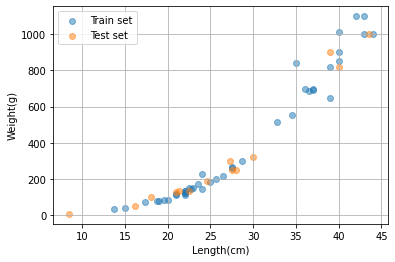

In [180]:
# Weight ~ Length 시각화. 훈련/ 테스트 셋의 색깔을 다르게 표현.
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label='Train set')
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label='Test set')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.grid()
plt.show()

## KNN Regressor 모델 훈련, 평가

1. KNN 모델 생성
2. KNN 모델 훈련 셋으로 훈련
3. 평가
    * 1) .훈련 셋 평가
    * 2). 테스트셋 평가


In [181]:
knn_reg = KNeighborsRegressor()  # ML 모델 생성

In [182]:
knn_reg.fit(X_tr, y_tr) # 모델 훈련 , 지도학습

KNeighborsRegressor()

In [183]:
y_tr_pred = knn_reg.predict(X_tr) # 훈련 셋의 (무게) 예측값

print(y_tr_pred)

[  88.6  123.    79.6   70.6  723.   193.   847.   847.  1010.   123.
   95.   123.   174.   248.  1010.   847.   174.   113.   248.   847.
  659.   224.   723.    60.   140.    60.   719.   694.2  248.   167.
  847.   113.   168.   123.  1010.   136.    79.6  719.   123.   193.
  990.   659. ]


In [184]:
print(y_tr) # 훈련 셋의 (무게) 실제값

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


KNN(K-Nearest Neighbors) Regressor는 샘플에서 가장 가까운 k개의 훈련 셋의 레이블(타겟) 들의 편균으로 숫자를 예측하는 ML모델.

In [185]:
# 첫번째 훈련 샘플에서 가장 가까운 이웃 5개의 인덱스
indices = knn_reg.kneighbors(X_tr[0].reshape(1,1), return_distance=False)

indices

array([[ 0, 10, 36,  2, 17]])

In [186]:
y_tr[indices[0]] # 가장 가까운 이웃 5개의 무게(타겟)들의 평균

array([ 85.,  85.,  80.,  78., 115.])

In [187]:
# 테스트셋의 예측값
y_te_pred = knn_reg.predict(X_te)
y_te_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [188]:
#테스트셋의 실제값
print(y_te)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


## 회귀모델의 평가지표

* MAE(Mean Absolute Error) : 오차들의 절대값의 평균.
* MSE(Mean Squared Error) : 오차들의 제곱의 평균.
* RMSE(Root Mean Squared Error) : MSE의 제곱근
* 값이 작을 수록 좋은 점수.(값이 작을 수록 더 좋은 회귀모델)
    * 그러나, 평가지표는 일반적으로 값이 클 수록 좋은 점수, 값이 작을수록 나쁜 점수로 생각.
    * 회귀에서도 오차가 작을수록 점수가 높아지고, 오차가 클 수록 점수가 낮아지는 평가 지표를 개발 -> R2 score(결정계수)
    * R2 score는 1에 가까울 수록 좋은(오차가 작은) 모델, 1보다 작을 수록 오차가 큰 모델
    

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}} 
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표. (1-x / x = 양수 이기 때문에 1보다 클 수 없음)
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [189]:
# 훈련 셋 평가 지표들
print('MAE:', mean_absolute_error(y_tr, y_tr_pred))
print('MSE:', mean_squared_error(y_tr, y_tr_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
print('R2 score:', r2_score(y_tr, y_tr_pred))

MAE: 35.76190476190476
MSE: 3716.5161904761903
RMSE : 60.96323638453089
R2 score: 0.9698823289099254


In [190]:
# 테스트 셋 평가 지표들
print('MAE:', mean_absolute_error(y_te, y_te_pred))
print('MSE:', mean_squared_error(y_te, y_te_pred))
print('RMSE :', np.sqrt(mean_squared_error(y_te, y_te_pred)))
print('R2 score:', r2_score(y_te, y_te_pred))

MAE: 19.157142857142862
MSE: 721.7385714285714
RMSE : 26.865192562655704
R2 score: 0.992809406101064


In [191]:
knn_reg.score(X_tr, y_tr) # 훈련 셋 점수 - KNN Regressor의 score 메서드는 결정계수를 리턴.(r2_score)

0.9698823289099254

In [192]:
knn_reg.score(X_te, y_te)

0.992809406101064

## 선형 회귀(Linear Regression)

머신 러닝 알고리즘 : 

* 사례 기반 학습 (instance-based learning)
    * KNN , ....
    * 수학적인 모델을 만들지 않고, 훈련 셋 데이터의 특징들을 사용해서 예측
    * 이상치(outlier)들이 많은 경우에는 성능이 나빠질 수 있음.

* 모델 기반 학습 (model-based learing)
    * Linear Regression, ...
    * 훈련 셋을 사용해서 수학적인 모델을 만들고, 모델을 사용해서 예측

In [193]:
lin_reg = LinearRegression() # ML 모델 생성

In [194]:
lin_reg.fit(X_tr, y_tr) # ML 모델을 훈련 셋으로 학습.

LinearRegression()

In [195]:
lin_reg.coef_ # coefficient : 독립변수 x에 곱해주는 계수(상수)

array([39.01714496])

In [196]:
lin_reg.intercept_ # y절편 : 

-709.0186449535477

$$
Weight = 39 \times Length  - 709
$$

선형 회귀의 학습 결과는 
$$ 
y = a \times x + b 
$$ 
수학 모델에서 직선의 기울기(계수)a 와 직선의 y 절편 b를 찾는 과정

In [197]:
y_tr_pred = lin_reg.predict(X_tr)
y_tr_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [198]:
39 * X_tr[:5] - 790

array([[ -25.6],
       [  68. ],
       [ -60.7],
       [-111.4],
       [ 614. ]])

In [199]:
y_tr

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [200]:
mse = mean_squared_error(y_tr, y_tr_pred)

print(mse)

print(np.sqrt(mse))

print(r2_score(y_tr, y_tr_pred))

# > KNN의 결과보다 평균적으로 오차가 더 크다.

7422.953552609781
86.1565641875869
0.939846333997604


In [201]:
y_te_pred = lin_reg.predict(X_te)

y_te_pred

array([-381.27462726,   -6.71003561,  363.95284155,  122.04654277,
        168.86711673,  851.66715359,  461.49570396,  250.80312115,
        812.65000863,  110.34139928,  988.22716096,  -76.94089654,
        383.46141403,  356.14941255])

In [202]:
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [203]:
mse = mean_squared_error(y_te, y_te_pred)

print(mse)

print(np.sqrt(mse))

print(r2_score(y_te, y_te_pred))

17590.265977889187
132.6283000640858
0.8247503123313558


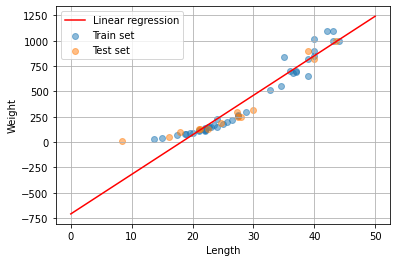

In [204]:
# 훈련 셋 산점도
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label = 'Train set') # ravel = 1차원으로 변형

# 테스트 셋 산점조
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label = 'Test set')

# 선형 회귀 모델(직선 y = ax + b) 시각화

xs = np.arange(0,50, 0.01)
a = lin_reg.coef_[0]
b = lin_reg.intercept_
ys = a * xs + b
plt.plot(xs,ys, 'r-', label = 'Linear regression')

plt.grid()
plt.legend()

plt.xlabel('Length')
plt.ylabel('Weight')


plt.show()

## 2차항을 포함하는 선형회귀

Scikit-Learn 패키지의 클래스 🇰

* 변환기(transformer)
    * StandardScaler, MinMaxScaler, PolynomialFeature.....
    * fit, transform, fit_transform 메서드를 가지고 있음.
* 예측기(estimator)
    * 머신 러닝 알고리즘 클래스 : KNeighborsClassifier, KNeighborsRegressor, ...
    * fit, predict, score 메서드를 가지고 있음

In [205]:
X_tr[:5] # 훈련 셋이서 첫 5마리 물고기의 길이

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [206]:
X_tr_poly = np.c_[X_tr ** 2 , X_tr]
X_tr_poly[:5]

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

## polynomialFeatures 클래스를 사용한 다차항 추가

In [207]:
poly_features = PolynomialFeatures(include_bias=False)
# interation_only = 
X_tr_poly = poly_features.fit_transform(X_tr)
X_tr_poly[:5]

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [208]:
X_te_poly = poly_features.fit_transform(X_te)
X_te_poly[:5]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25],
       [ 21.3 , 453.69],
       [ 22.5 , 506.25]])

In [209]:
lin_reg = LinearRegression() # 모델 생성

In [210]:
lin_reg.fit(X_tr_poly, y_tr) # 모델 훈련

LinearRegression()

In [211]:
coefs = lin_reg.coef_ # 1,2차항에 곱해지는 계수들
print(coefs) # (w1, w2)

[-21.55792498   1.01433211]


In [212]:
intercept= lin_reg.intercept_ # y절편 (y축과 만나는 점)
print(intercept) # (w0)

116.05021078278395


2차항을 포함하는 선형 회귀 모델의 학습 결과

$$
y = w_0 + w_1 \times x + w_2 \times x^2
$$

In [213]:
y_tr_pred = lin_reg.predict(X_tr_poly) # 훈련셋 예측값

In [214]:
mse = mean_squared_error(y_tr, y_tr_pred)

print(mse)

print(np.sqrt(mse))

print(r2_score(y_tr, y_tr_pred))

3617.991740363965
60.14974430838393
0.9706807451768623


In [215]:
# 테스트 셋 평가
y_te_pred = lin_reg.predict(X_te_poly)

In [216]:
mse = mean_squared_error(y_te, y_te_pred)

print(mse)

print(np.sqrt(mse))

print(r2_score(y_te, y_te_pred))

2248.9974694392668
47.42359612512812
0.9775935108325122


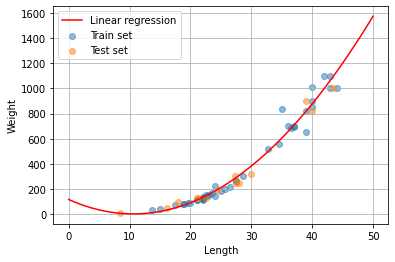

In [217]:
# 훈련 셋 산점도
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label = 'Train set') # ravel = 1차원으로 변형

# 테스트 셋 산점조
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label = 'Test set')

# 선형 회귀 모델(직선 y = w0 + w1 * x + w2 * x^2) 시각화
xs = np.arange(0,50, 0.001)
ys = intercept + coefs[0] * xs + coefs[1] * xs **2 
plt.plot(xs,ys, 'r-', label = 'Linear regression')

plt.grid()
plt.legend()

plt.xlabel('Length')
plt.ylabel('Weight')


plt.show()

# 모든 특성을 사용한 선형 회귀

In [220]:
X = perch.iloc[:, 2:].values
y = perch['Weight'].values

In [221]:
X[:5]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [222]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

## Train/Test split

In [223]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size = 0.25, # test_set 0.3 / training_set
                                          random_state=42)

In [224]:
knn = KNeighborsRegressor() # ML 모델 생성

In [225]:
knn.fit(X_tr, y_tr) # ML 모델 훈련

KNeighborsRegressor()

In [227]:
y_tr_pred = knn.predict(X_tr) # 훈련 셋 예측값

In [229]:
mse = mean_squared_error(y_tr, y_tr_pred)
print('RMSE:', np.sqrt(mse)) # 훈련 셋 RMSE

RMSE: 54.64954145235237


In [232]:
print('훈련 셋 r2_score:', r2_score(y_tr, y_tr_pred))

훈련 셋 r2_score: 0.97579760182756


In [235]:
y_te_pred = knn.predict(X_te) # 테스트 셋 예측값

In [238]:
t_mse = mean_squared_error(y_te, y_te_pred)
print('test_RMSE:', np.sqrt(t_mse)) # 훈련 셋 RMSE

test_RMSE: 28.93630937075425


* 과대적합(overfitting) : 훈련 셋의 점수가 테스트 셋의 점수보다 훨씬 좋은 경우
    * 일반적으로 과대적합은 자주(거의 대부분) 나타남.
    * 과대적합의 크기를 줄여주는 것이 머신 러닝의 목적 중 하나
* 과소적합(underfitting) : 훈련 셋의 점수가 테스트 셋의 점수보다 나쁜 경우
    * 일반적으로 과소적합은 흔히 나타나지는 않음. 
    * 훈련 / 테스트 셋의 샘플 개수가 적으면 과소적합이 나타나기도 함.
    * 데이터를 더 수집해서 샘플 개수를 늘려야 함.

## 1차항만 고려한 선형 회귀

In [240]:
lin_reg.fit(X_tr, y_tr) # 모델 훈련

LinearRegression()

In [241]:
lin_reg.coef_ # Weight	Length	Diagonal Height

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [242]:
lin_reg.intercept_ 

-610.0275364260515

In [245]:
y_tr_pred = knn.predict(X_tr) # 훈련 셋 예측값
mse = mean_squared_error(y_tr, y_tr_pred)
print('MSE :', mse)
print('RMSE:', np.sqrt(mse)) # 훈련 셋 RMSE

MSE : 2986.5723809523806
RMSE: 54.64954145235237


In [246]:
y_te_pred = knn.predict(X_te) # 훈련 셋 예측값
mse = mean_squared_error(y_te, y_te_pred)
print('MSE :', mse)
print('RMSE:', np.sqrt(mse)) # 훈련 셋 RMSE

MSE : 837.3100000000001
RMSE: 28.93630937075425


KNN의 훈련 점수보다 나쁨

## 2차할까지 고려한 선형 회귀

### Pipeline = 변환기1 + 변환기2 + .... + (제일 마지막) 예측기

In [253]:
poly_features = PolynomialFeatures(include_bias=False)
lin_reg = LinearRegression()
#PolynomialFeatures + LinearRegression ==> Pipeline
pipe = Pipeline([('poly', poly_features),
                 ('reg',lin_reg)])

In [254]:
pipe

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [255]:
pipe.fit(X_tr, y_tr) # 모델 훈련 
# 1) poly.fit_transform(X_tr)
# 2) ==> reg.fit(X_tr변환)
# pipe를 사용하면 변환 할 필요가 없어짐

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [256]:
pipe['reg'].coef_ # 선형회귀 모델 학습 결과 - 계수들

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [257]:
pipe['reg'].intercept_

67.36628210088094

In [260]:
print('Train r2 score = ', pipe.score(X_tr, y_tr))
print('Test r2 score = ', pipe.score(X_te, y_te))

Train r2 score =  0.9920055538341062
Test r2 score =  0.9492609601552375
